# Universidade Federal de Minas Gerais
## Computação Evolucionária - TTC
### Trabalho Prático 2 - Questão 2

Daniela Amaral Sampaio - 2017074351

Matheus Brito Faria - 2017074386

## 1. Introdução

A questão 2 do trabalho prático 2 tem como objetivo projetar e implementar um algoritmo genético geracional (GGA) com codificação binária para
solucionar o problema da Mochila 0/1, descrito da seguinte forma: 

`“Dados N itens, onde cada item possui um benefício (vj) e um peso associado (wj), o problema consiste em selecionar o subconjunto de itens que maximiza a soma dos benefícios sem ultrapassar a capacidade (cap) da Mochila”.`

A modelagem matemática é dada por:

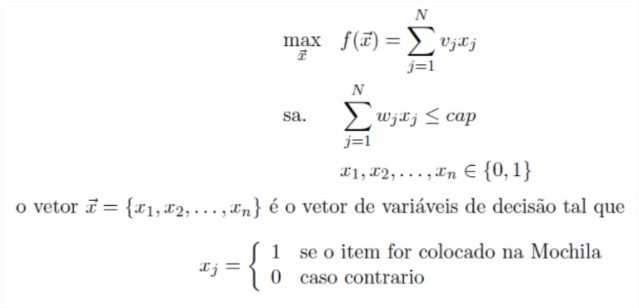

## 2. Implementação

### 2.1. Classe `KnapsackProblemSolver `

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Na classe `KnapsackProblemSolver` são possíveis observar várias funções, em especial, destacam-se:


*   `def calculate_fitness`: São defidos o vetor de pesos e o vetor de valores da mochila. Calcula-se, também, o valor da penalidade, que é a soma do total de pesos subtraído do limite da capacidade, que é 35 . Quando o valor da penalidade for maior que 0, calcula-se o quanto desviou do objetivo.
*   `def calculate_spf`: Calcula-se o Operador de Seleção Proporcional ao Fitness (SPF), que é a probabilidade de seleção para o i-ésimo indivíduo. Faz-se a divisão entre o fitness do individuo atual e a soma de todos os fitness da população.
*   `def run_roulette_wheel`: Função utilizada para escolher indivíduos da geração atual para fazerem parte da geração futura, através de um sorteio que segue o seguinte método: cada indivíduo tem um 'valor' de aptidão, quanto maior a aptidão, maior a chance de ser escolhido na roleta. A roleta gira um determinado número de vezes dependendo do tamanho da população.
*  ` def run_crossover:` Função utilizada para realizar o crossover com probabilidade de 60%. Substitui os pais pelos filhos.
* ` def run_mutation:` Função utilizada para gerar a mutação 0/1 dos indivíduos com probabilidade de mutação de 10%
* `def fit`: A função fit é utlizada para inicializar a população, calcular o fitness, e salvar os melhores resultados. Enquanto o critério de parada não chega, que nesse caso são 40 iterações, são feitas as seleções dos pais, o crossover, as mutações e os cálculos de fitness. Em seguida, exibe-se os resultados obtidos, que são o ganho, a capacidade e o fitness de cada iteração. 



In [ ]:
class KnapsackProblemSolver:
    def __init__(self, 
                 capacity, 
                 values, 
                 weights,
                 population_size=20,
                 crossover_rate=0.6,
                 mutation_rate=0.1):
        self.capacity = capacity
        self.weights = np.array(weights)
        self.values = np.array(values)
        assert self.weights.shape == self.weights.shape
        self.num_itens = self.weights.shape[0]
        self.population_size = population_size
        self.crossover_rate = crossover_rate
        self.mutation_rate = mutation_rate
        self.rho = np.max(self.values/self.weights)
        self.top_individuals = list()

    def initialize_population(self):
        self.population = np.random.randint(2, size=(self.population_size, 
                                                     self.num_itens))
        
    def calculate_fitness(self):
        self.total_value = self.population.dot(self.values)
        self.total_weights = self.population.dot(self.weights)
        penalty = self.total_weights - self.capacity
        penalty[penalty<0] = 0
        self.fitness = self.total_value - (self.rho * penalty)
        self.calculate_spf()
        return self.fitness

    def calculate_spf(self):
        self.spf = self.fitness / np.sum(self.fitness)
        return self.spf
    
    def run_roulette_wheel(self):
        parents_index = list()
        probs = [sum(self.spf[:i+1]) for i in range(self.population_size)]
        for _ in range(self.population_size):
            random_value = np.random.rand()
            for (individual_index, individual_spf) in enumerate(probs):
                if random_value <= individual_spf:
                    parents_index.append(individual_index)
                    break
        self.parents_index = np.array(parents_index)
        return self.parents_index

    def select_parents(self):
        self.run_roulette_wheel()
        selection = self.population[self.parents_index]
        pairs = [[selection[i], selection[i+1]] 
                 for i in range(0, self.population_size, 2)]
        self.parents = np.array(pairs)
        return self.parents

    def run_crossover(self):
        next_population = list()
        for pair in self.parents:
            if np.random.rand() < self.crossover_rate:
                cut_point = np.random.randint(1, self.num_itens)
                save_slice = pair[1][:cut_point].copy()
                pair[1][:cut_point] = pair[0][:cut_point]
                pair[0][:cut_point] = save_slice
            next_population.append(pair[0])
            next_population.append(pair[1])
        self.population = np.array(next_population)
        return self.population

    def run_mutation(self):
        individual_index = np.random.randint(self.num_itens)
        for bit in self.population[individual_index]:
            if np.random.rand() < self.mutation_rate:
                self.population[individual_index][bit] = \
                self._not(self.population[individual_index][bit])
        self.population[individual_index]
        return self.population

    def get_best_fitness(self):
        best_one = np.argmax(self.fitness)
        self.top_individuals.append((self.total_value[best_one], 
                                     self.total_weights[best_one]))
        return [self.top_individuals[-1][0], 
                self.top_individuals[-1][1],
                self.fitness[best_one],
                self.population[best_one]]

    def get_top_indiviual(self):
        return

    @staticmethod
    def _not(bit:int):
        return 0 if bit else 1

    def fit(self, max_iterations=40):
        self.initialize_population()
        self.calculate_fitness()
        best_results = list()
        iteration = 0 
        while iteration < max_iterations:

            self.select_parents()
            self.run_crossover()
            self.run_mutation()
            self.calculate_fitness()
            gain, capacity, fitness, config = self.get_best_fitness()
            print(f"Iteration {iteration+1}: Gain={gain} Capacity={capacity} Fitness={fitness}")
            best_results.append([gain, capacity, fitness])
            iteration +=1
        return np.array(best_results), config


capacity = 35
weights = [10, 18, 12, 14, 13, 11, 8, 6]
values = [5, 8, 7, 6, 9, 5, 4, 3]

solver = KnapsackProblemSolver(capacity=capacity, 
                               values=values, 
                               weights=weights)

results, best_config = solver.fit()

Iteration 1: Gain=21 Capacity=36 Fitness=20.307692307692307
Iteration 2: Gain=19 Capacity=31 Fitness=19.0
Iteration 3: Gain=18 Capacity=32 Fitness=18.0
Iteration 4: Gain=24 Capacity=41 Fitness=19.846153846153847
Iteration 5: Gain=19 Capacity=31 Fitness=19.0
Iteration 6: Gain=19 Capacity=31 Fitness=19.0
Iteration 7: Gain=21 Capacity=36 Fitness=20.307692307692307
Iteration 8: Gain=21 Capacity=36 Fitness=20.307692307692307
Iteration 9: Gain=23 Capacity=39 Fitness=20.23076923076923
Iteration 10: Gain=23 Capacity=39 Fitness=20.23076923076923
Iteration 11: Gain=23 Capacity=39 Fitness=20.23076923076923
Iteration 12: Gain=19 Capacity=35 Fitness=19.0
Iteration 13: Gain=21 Capacity=35 Fitness=21.0
Iteration 14: Gain=21 Capacity=35 Fitness=21.0
Iteration 15: Gain=21 Capacity=35 Fitness=21.0
Iteration 16: Gain=19 Capacity=35 Fitness=19.0
Iteration 17: Gain=22 Capacity=39 Fitness=19.23076923076923
Iteration 18: Gain=22 Capacity=39 Fitness=19.23076923076923
Iteration 19: Gain=22 Capacity=39 Fitness=

### 2.2. Resultados Obtidos

In [ ]:
print(f"A melhor configuracao eh: {best_config}")
print(f"Com o valor de ganho de {results[-1, 0]}")
print(f"Usando {results[-1, 1]} de capacaidade")

A melhor configuracao eh: [0 0 0 1 1 0 1 0]
Com o valor de ganho de 19.0
Usando 35.0 de capacaidade


*   Ganho igual a 19, como pode ser observado no gráfico da esquerda.
*   Capacidade igual a 35, como pode ser observado no gráfico do meio.
*   Fitness igual a 19, como pode ser observado no gráfico da direita.

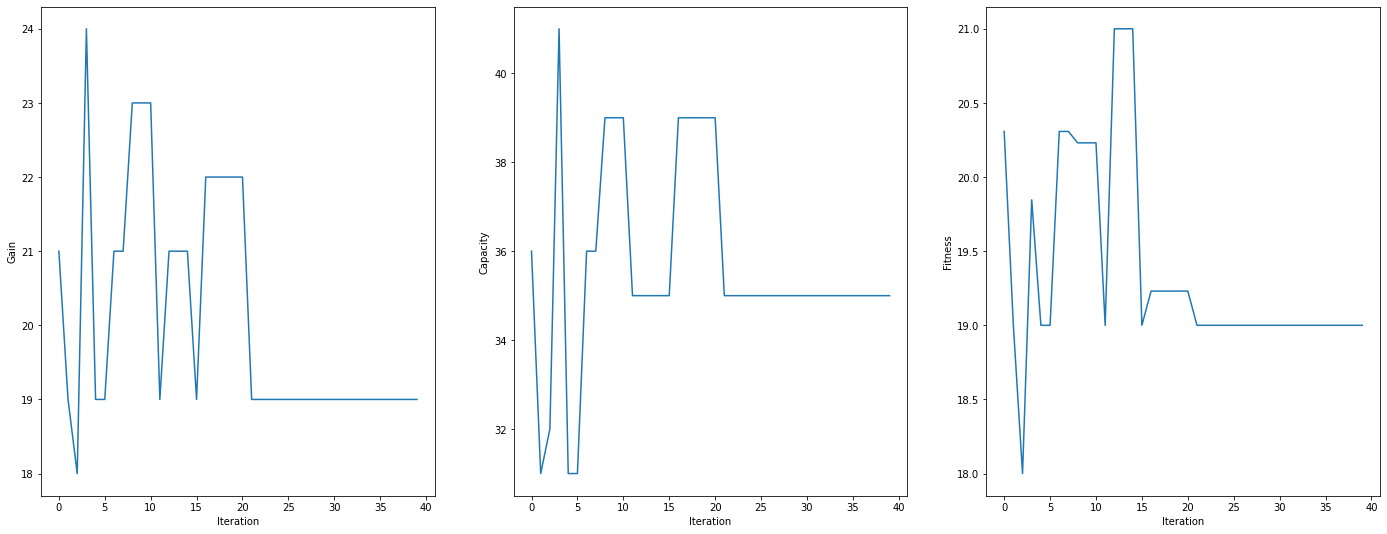

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(24,9))

ax[0].set_ylabel('Gain')
ax[0].set_xlabel('Iteration')
ax[0].plot(results[:, 0], label='Gain')

ax[1].set_ylabel('Capacity')
ax[1].set_xlabel('Iteration')
ax[1].plot(results[:, 1], label='Capacity')

ax[2].set_ylabel('Fitness')
ax[2].set_xlabel('Iteration')
ax[2].plot(results[:, 2], label='Fitness')

plt.show()

## 3. Conclusão

Durante a execução do trabalho foi possível utilizar na prática conceitos aprendidos em sala de aula e acredita-se que o resultado final do trabalho tenha sido satisfatório, visto que conseguiu-se selecionar o subconjunto de itens que maximiza a soma dos benefícios sem ultrapassar a capacidade da Mochila”.